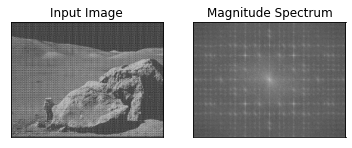

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
#Filter creating
# Low pass filter
mask = np.zeros((img.shape[0],img.shape[1],2),np.uint8)
centerX, centerY = (int(img.shape[0] / 2),int(img.shape[1] / 2))
mask[centerX-50:centerX+50, centerY - 50:centerY+50,:] = 1

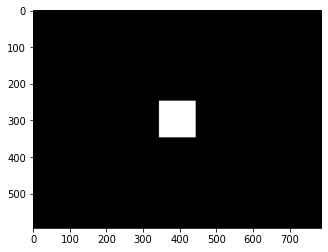

In [3]:
plt.imshow(mask[:,:,0], cmap = 'gray')

In [4]:
# Filtering
dft_shift = dft_shift*mask

C:\Users\Svetlana\AppData\Local\Temp\ipykernel_3864\3830399572.py:1: RuntimeWarning: divide by zero encountered in log
  filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


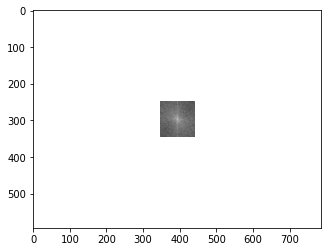

In [7]:
filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(filtering_magn_res, cmap='gray')

In [ ]:
#fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

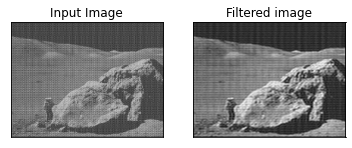

In [17]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

In [2]:
import numpy as np
import cv2
from skimage.feature import peak_local_max
from matplotlib import pyplot as plt

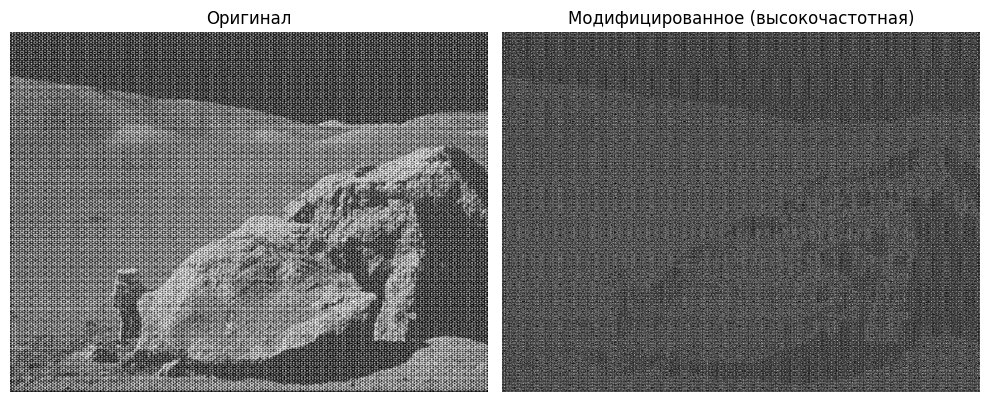

In [3]:
img = cv2.imread('periodic_noise.jpg', cv2.IMREAD_GRAYSCALE)

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

sigma = 50 
gaussian_lowpass = np.exp(-((x - cols // 2) ** 2 + (y - rows // 2) ** 2) / (2 * sigma ** 2))
gaussian_highpass = 1 - gaussian_lowpass 

dft_shift *= gaussian_highpass[:, :, np.newaxis]

img_back = cv2.idft(np.fft.ifftshift(dft_shift))
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Оригинал')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Модифицированное (высокочастотная)')
plt.axis('off')

plt.tight_layout()
plt.show()

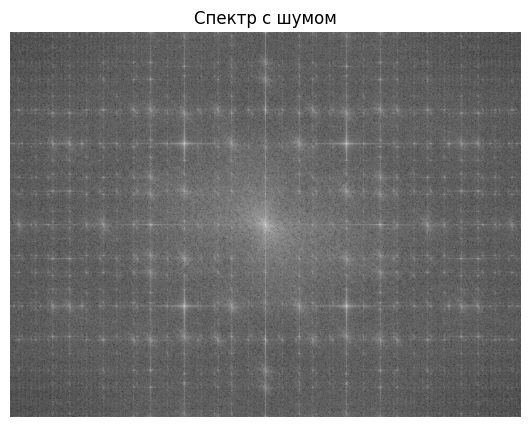

In [4]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

plt.figure(figsize=(10, 5))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Спектр с шумом')
plt.axis('off')
plt.show()


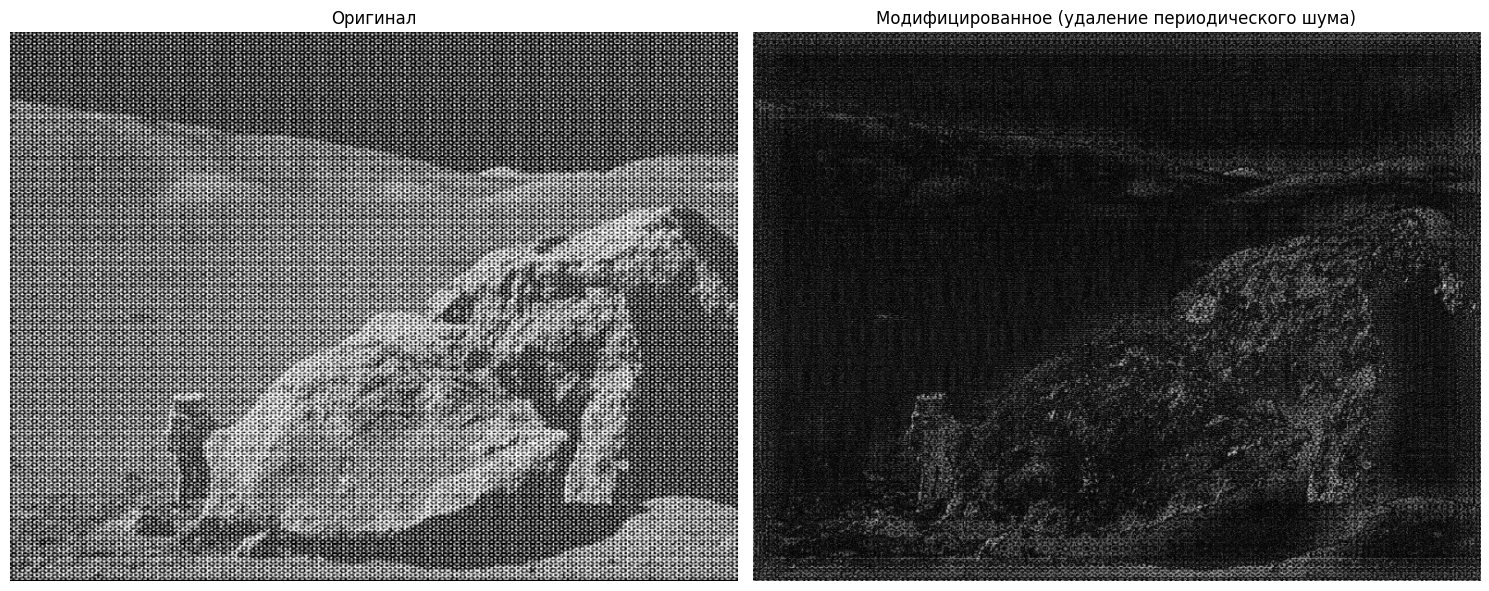

In [5]:
peaks = peak_local_max(magnitude_spectrum, min_distance=15, threshold_abs=200)

h, w = img.shape
mask = np.ones_like(dft_shift, dtype=dft_shift.dtype)

notch_radius = 5  

for r, c in peaks:
    cv2.circle(mask, (c, r), notch_radius, (0, 0), thickness=-1)

    r_sym = (h - r) % h
    c_sym = (w - c) % w
    cv2.circle(mask, (c_sym, r_sym), notch_radius, (0, 0), thickness=-1)

fshift = dft_shift * mask
img_back = cv2.idft(np.fft.ifftshift(fshift))
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Оригинал')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Модифицированное (удаление периодического шума)')
plt.axis('off')

plt.tight_layout()
plt.show()
